In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [35]:
df = pd.read_csv("fire-inspection-findings.csv")
df.head()

,Site,Region,Event Date,Item Type,Title,Report Number and/or Comments,Year First Observed,Report Type
0,ANO,4,10/19/2007,NCV (Green ),(PIM) FAILURE TO MAINTAIN ADEQUATE FIRE BRIGAD...,2007006,2007,Triennial
1,ANO,4,8/3/2001,Violation (White ),(PIM) The Acceptability of the Use of Manual A...,Open in TR 2001006 and discussed in IR 2003012...,2001,Triennial
2,ANO,4,9/30/2000,NCV (Green ),(PIM) INOPERABILITY OF UNIT 2 FIRE DOOR 269,2000016,2000,Annual/Quarterly
3,ANO,4,3/31/2001,NCV (Green ),(PIM) INDIVIDUAL WITHOUT REQUIRED TRAINING PER...,2000013,2001,Annual/Quarterly
4,ANO,4,10/22/2001,NCV (Green ),(PIM) FAILURE TO ENSURE THAT ONE TRAIN OF BWST...,2001007,2001,Annual/Quarterly


In [34]:
df["Site"].value_counts()

BRAI    21
KEWA    20
WC      18
FERM    16
INPT    15
        ..
HAT      1
BV       1
BRU      1
PB       1
SEAB     1
Name: Site, Length: 85, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Site                           561 non-null    object
 1   Region                         572 non-null    int64 
 2   Event Date                     572 non-null    object
 3   Item Type                      572 non-null    object
 4   Title                          572 non-null    object
 5   Report Number and/or Comments  572 non-null    object
 6   Year First Observed            572 non-null    int64 
 7   Report Type                    572 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.9+ KB


In [37]:
df.describe()

,Region,Year First Observed
count,572.000000,572.000000
mean,2.639860,2004.396853
std,1.066782,2.882070
min,1.000000,1999.000000
25%,2.000000,2002.000000
50%,3.000000,2004.000000
75%,4.000000,2007.000000
max,4.000000,2009.000000


In [39]:
df["Site"].value_counts()

BRAI    21
KEWA    20
WC      18
FERM    16
INPT    15
        ..
HAT      1
BV       1
BRU      1
PB       1
SEAB     1
Name: Site, Length: 85, dtype: int64

In [42]:
df["Report Type"].value_counts()

Triennial           320
Annual/Quarterly    252
Name: Report Type, dtype: int64

In [50]:
df.isnull().sum()

Site                             11
Region                            0
Event Date                        0
Item Type                         0
Title                             0
Report Number and/or Comments     0
Year First Observed               0
Report Type                       0
dtype: int64

In [53]:
df["Site"].fillna("Unknown", inplace=True)
df.isnull().sum()

Site                             0
Region                           0
Event Date                       0
Item Type                        0
Title                            0
Report Number and/or Comments    0
Year First Observed              0
Report Type                      0
dtype: int64

In [62]:
df["Event Date"][176]

'9/30/2006'

In [83]:
df['Event Date'] = pd.to_datetime(df['Event Date'], format='%d/%m/%Y')
df = df.sort_values(by=['Event Date'])
df.reset_index(inplace=True)

df.head()


,level_0,index,Site,Region,Event Date,Item Type,Title,Report Number and/or Comments,Year First Observed,Report Type
0,0,0,CNS,4,2000-01-04,NCV (Green ),(PIM) APPENDIX R LIGHTING INADEQUATE,2000004,2000,Annual/Quarterly
1,1,1,HAR,2,2000-01-04,NCV (Green ),(PIM) Fire protection wrap/penetration seal in...,This NCV was found in the integrated report 20...,2000,Annual/Quarterly
2,2,2,WAT,4,2000-01-07,NCV (Green ),(PIM) Failure to ensure fire extinguishers rem...,2000005,2000,Annual/Quarterly
3,3,3,VY,1,2000-01-07,NCV (Green ),(PIM) Violation of FSAR Cable Separation Crite...,2000005,2000,Annual/Quarterly
4,4,4,MILL,1,2000-01-07,NCV (Green ),(PIM) FAILURE TO MAINTAIN FIRE FIGHTING STRATE...,2000008,2000,Annual/Quarterly


In [84]:
df.drop(columns="index", inplace=True, axis=1)
df.head()

,level_0,Site,Region,Event Date,Item Type,Title,Report Number and/or Comments,Year First Observed,Report Type
0,0,CNS,4,2000-01-04,NCV (Green ),(PIM) APPENDIX R LIGHTING INADEQUATE,2000004,2000,Annual/Quarterly
1,1,HAR,2,2000-01-04,NCV (Green ),(PIM) Fire protection wrap/penetration seal in...,This NCV was found in the integrated report 20...,2000,Annual/Quarterly
2,2,WAT,4,2000-01-07,NCV (Green ),(PIM) Failure to ensure fire extinguishers rem...,2000005,2000,Annual/Quarterly
3,3,VY,1,2000-01-07,NCV (Green ),(PIM) Violation of FSAR Cable Separation Crite...,2000005,2000,Annual/Quarterly
4,4,MILL,1,2000-01-07,NCV (Green ),(PIM) FAILURE TO MAINTAIN FIRE FIGHTING STRATE...,2000008,2000,Annual/Quarterly


In [85]:
df.drop(columns="level_0", inplace=True, axis=1)
df.head()

,Site,Region,Event Date,Item Type,Title,Report Number and/or Comments,Year First Observed,Report Type
0,CNS,4,2000-01-04,NCV (Green ),(PIM) APPENDIX R LIGHTING INADEQUATE,2000004,2000,Annual/Quarterly
1,HAR,2,2000-01-04,NCV (Green ),(PIM) Fire protection wrap/penetration seal in...,This NCV was found in the integrated report 20...,2000,Annual/Quarterly
2,WAT,4,2000-01-07,NCV (Green ),(PIM) Failure to ensure fire extinguishers rem...,2000005,2000,Annual/Quarterly
3,VY,1,2000-01-07,NCV (Green ),(PIM) Violation of FSAR Cable Separation Crite...,2000005,2000,Annual/Quarterly
4,MILL,1,2000-01-07,NCV (Green ),(PIM) FAILURE TO MAINTAIN FIRE FIGHTING STRATE...,2000008,2000,Annual/Quarterly


In [89]:
df.isnull().sum()

Site                             0
Region                           0
Event Date                       0
Item Type                        0
Title                            0
Report Number and/or Comments    0
Year First Observed              0
Report Type                      0
dtype: int64

In [88]:
na_dates = df[df['Event Date'].isna()]
na_dates

df['Event Date'] = df['Event Date'].fillna(method='ffill')
df.head()

,Site,Region,Event Date,Item Type,Title,Report Number and/or Comments,Year First Observed,Report Type
0,CNS,4,2000-01-04,NCV (Green ),(PIM) APPENDIX R LIGHTING INADEQUATE,2000004,2000,Annual/Quarterly
1,HAR,2,2000-01-04,NCV (Green ),(PIM) Fire protection wrap/penetration seal in...,This NCV was found in the integrated report 20...,2000,Annual/Quarterly
2,WAT,4,2000-01-07,NCV (Green ),(PIM) Failure to ensure fire extinguishers rem...,2000005,2000,Annual/Quarterly
3,VY,1,2000-01-07,NCV (Green ),(PIM) Violation of FSAR Cable Separation Crite...,2000005,2000,Annual/Quarterly
4,MILL,1,2000-01-07,NCV (Green ),(PIM) FAILURE TO MAINTAIN FIRE FIGHTING STRATE...,2000008,2000,Annual/Quarterly


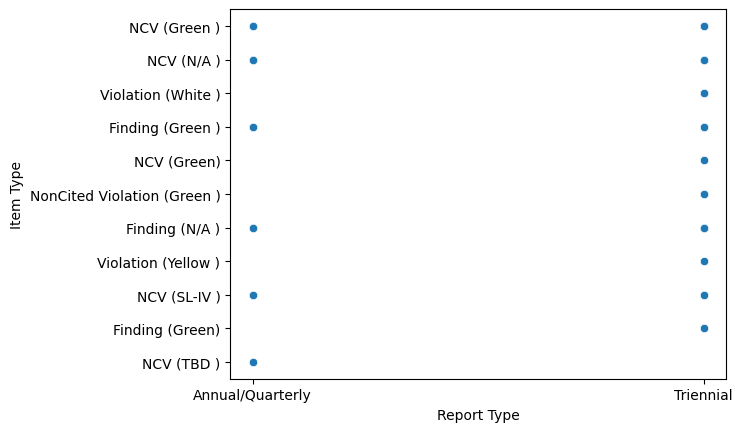

In [90]:
sns.scatterplot(data=df, x="Report Type", y="Item Type");

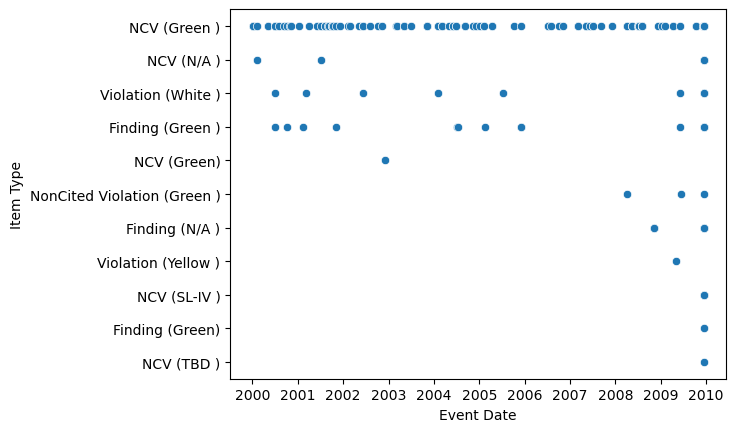

In [92]:
sns.scatterplot(data=df, x="Event Date", y="Item Type");

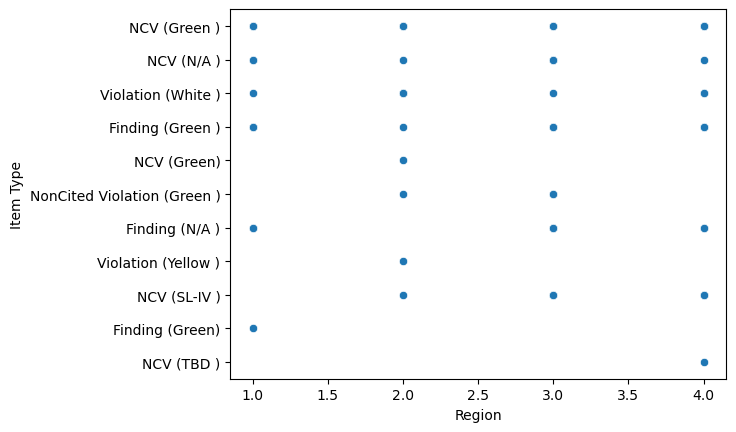

In [93]:
sns.scatterplot(data=df, x="Region", y="Item Type");

In [96]:
df["Title"].unique()

array(['(PIM) APPENDIX R LIGHTING INADEQUATE ',
       '(PIM) Fire protection wrap/penetration seal interface problems ',
       '(PIM) Failure to ensure fire extinguishers remained within their current hydrostatic test dates ',
       '(PIM) Violation of FSAR Cable Separation Criteria ',
       '(PIM) FAILURE TO MAINTAIN FIRE FIGHTING STRATEGIES ',
       '(PIM) INADEQUATE PROCEDURE FOR ALTERNATIVE SHUTDOWN FOR A CONTROL ROOM FIRE ',
       '(PIM) Failure to update procedures ONI-054 in a timely manner to include information used to alert operators about potential fire impacts upon RHR valves.',
       '(PIM) Failure to address extended inoperability of the control room sub floor CO2 system. ',
       '(PIM) A degraded 1-hour rated Darmatt raceway fire barrier found with an unsealed annular gap through the post-fire safe shutdown barrier envelope. ',
       '(PIM) Detectors found not installed in accordance with the fire code. ',
       '(PIM) PSEG FAILED TO ENSURE THE CO2 SYSTEMS FOR